In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
board = pd.read_csv('board_composition.csv')

## Figure 1 Board composition over the life cycle: Counts

In [ ]:
board['financingRoundNumer'] = board['financingRoundNumer'].apply(lambda x: 5 if x > 5 else x)

# Group data by financing round and calculate mean and median
board_filtered = board.dropna(subset=['financingRoundNumer'])  # Remove rows without financing round info
board_filtered['financingRoundNumer'] = board_filtered['financingRoundNumer'].astype(int)
board_filtered = board_filtered[board_filtered['financingRoundNumer'] <= 5]

mean_values = board_filtered.groupby('financingRoundNumer')[['numVCs', 'numExecs', 'numOut']].mean()
median_values = board_filtered.groupby('financingRoundNumer')[['numVCs', 'numExecs', 'numOut']].median()

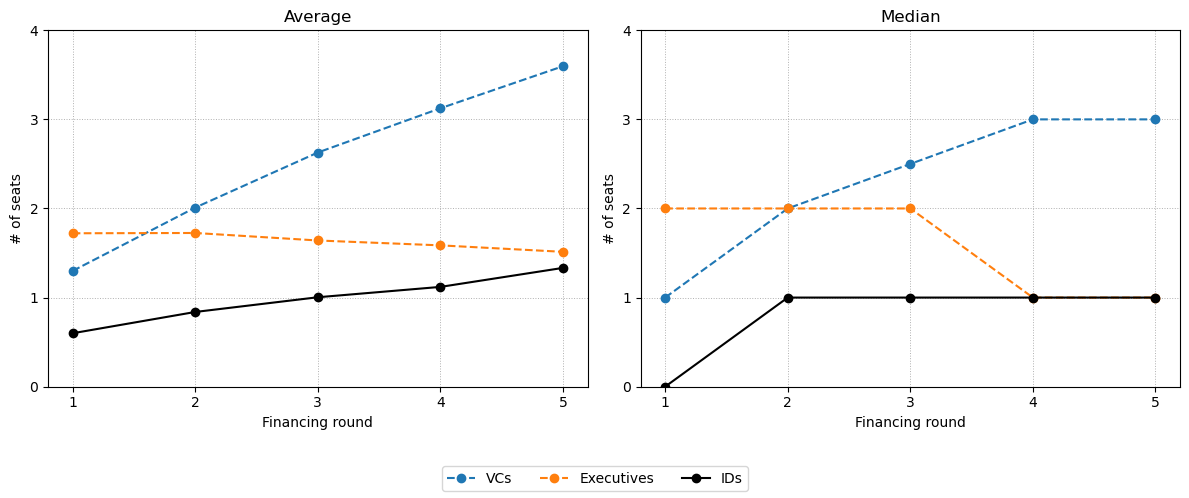

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=False)

# Average plot
ax = axes[0]
ax.plot(mean_values.index.tolist(), mean_values['numVCs'].tolist(), 'o--', label='VCs')
ax.plot(mean_values.index.tolist(), mean_values['numExecs'].tolist(), 'o--', label='Executives')
ax.plot(mean_values.index.tolist(), mean_values['numOut'].tolist(), 'o-', label='IDs', color='black')
ax.set_xlabel('Financing round')
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_ylabel('# of seats')
ax.set_title('Average')
ax.set_yticks([0, 1, 2, 3, 4])  # Set Y-axis ticks
ax.set_ylim(0, 4)  # Set Y-axis limits
ax.grid(True, linestyle=':', linewidth=0.7)

# Median plot
ax = axes[1]
ax.plot(median_values.index.tolist(), median_values['numVCs'].tolist(), 'o--', label='VCs')
ax.plot(median_values.index.tolist(), median_values['numExecs'].tolist(), 'o--', label='Executives')
ax.plot(median_values.index.tolist(), median_values['numOut'].tolist(), 'o-', label='IDs', color='black')
ax.set_xlabel('Financing round')
ax.set_title('Median')
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_ylabel('# of seats')
ax.set_yticks([0, 1, 2, 3, 4])  # Set Y-axis ticks
ax.set_ylim(0, 4)  # Set Y-axis limits
ax.grid(True, linestyle=':', linewidth=0.7)

# Create a single legend at the bottom
fig.legend(['VCs', 'Executives', 'IDs'], loc='lower center', ncol=3, frameon=True)

# Adjust layout to fit legend
plt.tight_layout(rect=[0, 0.1, 1, 1])

plt.show()

## Figure 2:  Board composition over the life cycle: Percentages

In [5]:
# Calculate total board size (sum of numVCs, numExecs, numOut)
board_filtered['board_size'] = board_filtered['numVCs'] + board_filtered['numExecs'] + board_filtered['numOut']

# Calculate percentage of each type
board_filtered['pct_VCs'] = board_filtered['numVCs'] / board_filtered['board_size']
board_filtered['pct_Execs'] = board_filtered['numExecs'] / board_filtered['board_size']
board_filtered['pct_IDs'] = board_filtered['numOut'] / board_filtered['board_size']

mean_values_pct = board_filtered.groupby('financingRoundNumer')[['pct_VCs', 'pct_Execs', 'pct_IDs', 'board_size']].mean()
median_values_pct = board_filtered.groupby('financingRoundNumer')[['pct_VCs', 'pct_Execs', 'pct_IDs', 'board_size']].median()

In [6]:
# Define colors and markers
colors = {'VCs': 'teal', 'Executives': 'orange', 'IDs': 'black', 'Board size': 'purple'}
linestyles = {'VCs': 'dashed', 'Executives': 'dashdot', 'IDs': 'solid', 'Board size': 'dotted'}

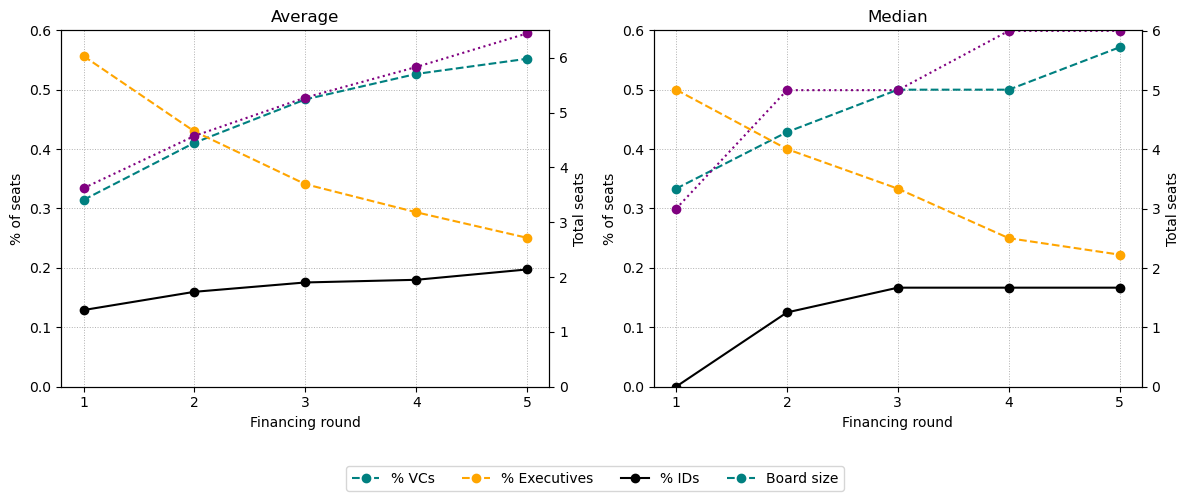

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=False)

# Average plot
ax = axes[0]
ax2 = ax.twinx()
ax.plot(mean_values_pct.index.tolist(), mean_values_pct['pct_VCs'].tolist(), 'o--', label='% VCs', color=colors['VCs'])
ax.plot(mean_values_pct.index.tolist(), mean_values_pct['pct_Execs'].tolist(), 'o--', label='% Executives', color=colors['Executives'])
ax.plot(mean_values_pct.index.tolist(), mean_values_pct['pct_IDs'].tolist(), 'o-', label='% IDs', color=colors['IDs'])
ax2.plot(mean_values_pct.index.tolist(), mean_values_pct['board_size'].tolist(), 'o:', label='Board size', color=colors['Board size'])

ax.set_xlabel('Financing round')
ax2.set_xticks([1, 2, 3, 4, 5])
ax.set_ylabel('% of seats')
ax.set_ylim(0, 0.6)
ax2.set_ylabel('Total seats')
ax2.set_yticks([0, 1, 2, 3, 4, 5, 6,7])  # Set Y-axis ticks for total seats
ax2.set_ylim(0, 6.5)  # Set Y-axis limits for total seats
ax.set_title('Average')
ax.grid(True, linestyle=':', linewidth=0.7)

# Median plot
ax = axes[1]
ax2 = ax.twinx()
ax.plot(median_values_pct.index.tolist(), median_values_pct['pct_VCs'].tolist(), 'o--', label='% VCs', color=colors['VCs'])
ax.plot(median_values_pct.index.tolist(), median_values_pct['pct_Execs'].tolist(), 'o--', label='% Executives', color=colors['Executives'])
ax.plot(median_values_pct.index.tolist(), median_values_pct['pct_IDs'].tolist(), 'o-', label='% IDs', color=colors['IDs'])
ax2.plot(median_values_pct.index.tolist(), median_values_pct['board_size'].tolist(), 'o:', label='Board size', color=colors['Board size'])

ax.set_xlabel('Financing round')
ax2.set_xticks([1, 2, 3, 4, 5])
ax.set_ylabel('% of seats')
ax.set_ylim(0, 0.6)
ax2.set_ylabel('Total seats')
ax2.set_yticks([0, 1, 2, 3, 4, 5, 6, 7])  # Set Y-axis ticks for total seats
ax2.set_ylim(0, 6.01)  # Set Y-axis limits for total seats
ax.set_title('Median')
ax.grid(True, linestyle=':', linewidth=0.7)

# Legend
fig.legend(['% VCs', '% Executives', '% IDs', 'Board size'], loc='lower center', ncol=4, frameon=True)

plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()

## Figure 3: Board control over the life cycle

In [62]:
# Define board control categories based on given rules in Section 3 of the paper
def classify_board_control(row):
    if row['board_size'] == 0:
        return 'Entrepreneur-controlled'
    elif row['numVCs'] > 0.5 * row['board_size'] or (row['numVCs'] == 0.5 * row['board_size'] and row['numExecs'] < 0.5 * row['board_size']):
        return 'VC-controlled'
    elif row['numExecs'] > 0.5 * row['board_size'] or (row['numExecs'] == 0.5 * row['board_size'] and row['numVCs'] < 0.5 * row['board_size']):
        return 'Entrepreneur-controlled'
    else:
        return 'Shared control'

# Apply classification function
board_filtered['board_control'] = board_filtered.apply(classify_board_control, axis=1)

# Compute percentage of each category per financing round
control_distribution = board_filtered.groupby('financingRoundNumer')['board_control'].value_counts(normalize=True).unstack()

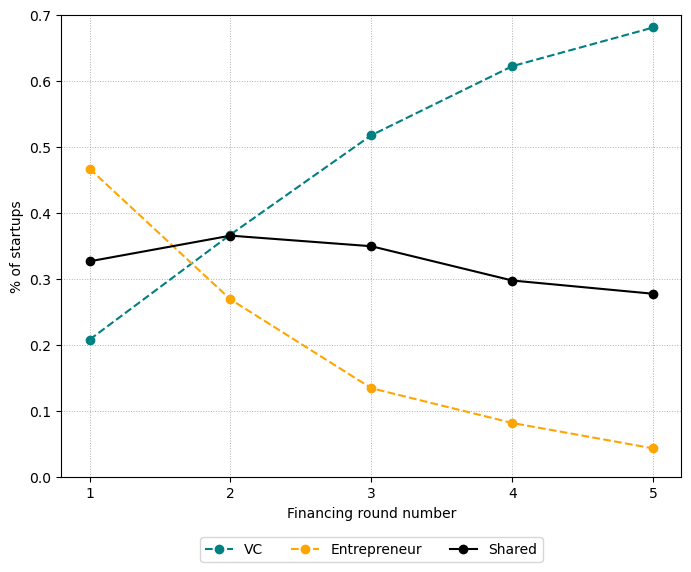

In [63]:
# Plot the results
plt.figure(figsize=(8, 6))

plt.plot(control_distribution.index.tolist(), control_distribution['VC-controlled'].tolist(), 'o--', label='VC', color='teal')
plt.plot(control_distribution.index.tolist(), control_distribution['Entrepreneur-controlled'].tolist(), 'o--', label='Entrepreneur', color='orange')
plt.plot(control_distribution.index.tolist(), control_distribution['Shared control'].tolist(), 'o-', label='Shared', color='black')

plt.xlabel('Financing round number')
plt.xlim(0.8, 5.2)
plt.xticks([1, 2, 3, 4, 5])
plt.ylabel('% of startups')
plt.ylim(0, 0.7)
plt.legend(loc='lower center', ncol=3, frameon=True, bbox_to_anchor=(0.5, -0.2))
plt.grid(True, linestyle=':', linewidth=0.7)
plt.show()

## Figure 4

In [78]:
# Identify the first financing year for each startup (CIK1)
first_financing_year = board_filtered[board_filtered['financingRoundNumer'] == 1][['cik1', 'year']]
first_financing_year = first_financing_year.rename(columns={'year': 'first_vc_year'})

# Merge with the full dataset to assign the first financing year to all rounds of each startup
df_merged = board_filtered.merge(first_financing_year, on='cik1', how='left')

# Keep only relevant columns for analysis
df_panel = df_merged[['cik1', 'first_vc_year', 'year', 'financingRoundNumer', 'board_control']]

# Group by ['first_vc_year', 'financingRoundNumer', 'board_control'] and count unique CIK1s
control_trends = df_panel.groupby(['first_vc_year', 'financingRoundNumer', 'board_control'])['cik1'].nunique().unstack(fill_value=0)

# Normalize within each year to get proportions
control_trends = control_trends.div(control_trends.sum(axis=1), axis=0)

control_trends_filtered = control_trends.loc[control_trends.index.get_level_values('first_vc_year') <= 2013]

In [65]:
# Define colors and styles for rounds
colors = {1: 'teal', 2: 'orange', 3: 'black'}
linestyles = {1: 'dashed', 2: 'dotted', 3: 'solid'}

/tmp/8054392.1.debian.q/ipykernel_57731/1548910540.py:13: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(round_data, 'o--', linestyle=linestyles[round_num],


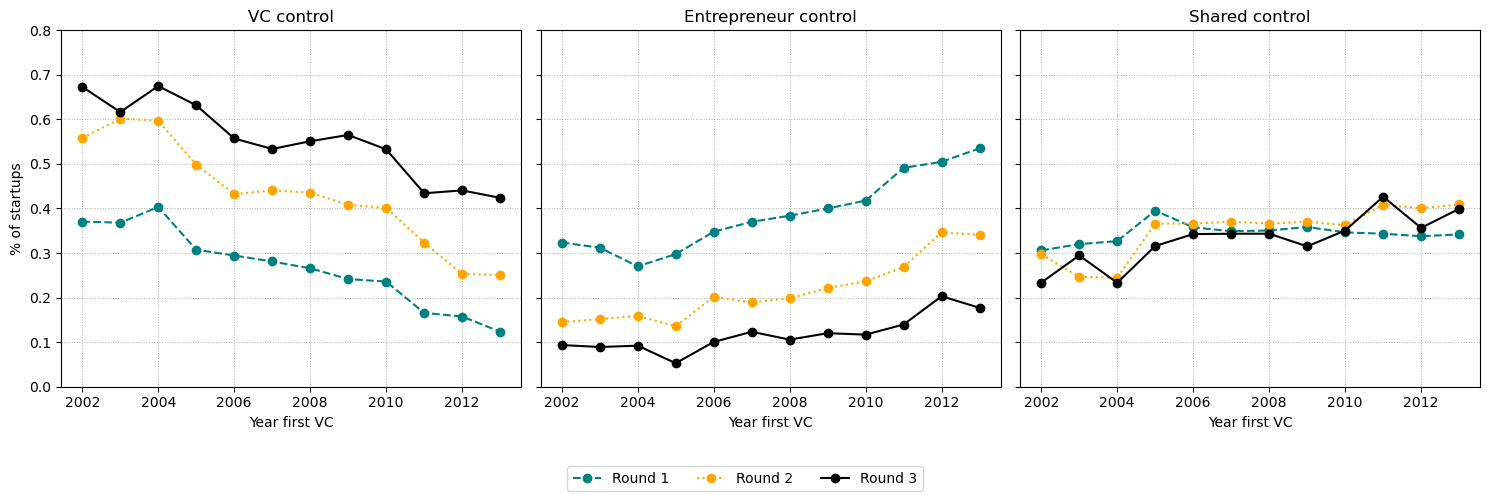

In [79]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Titles and control types
titles = ["VC control", "Entrepreneur control", "Shared control"]
control_types = ["VC-controlled", "Entrepreneur-controlled", "Shared control"]

# Plot each control type in separate subplots
for i, (ax, title, control_type) in enumerate(zip(axes, titles, control_types)):
    for round_num in [1, 2, 3]:  # Financing rounds 1, 2, 3
        try:
            round_data = control_trends_filtered.xs(round_num, level='financingRoundNumer')[control_type]
            ax.plot(round_data, 'o--', linestyle=linestyles[round_num], 
                    label=f'Round {round_num}', color=colors[round_num])
        except KeyError:
            continue
    ax.set_title(title)
    ax.set_xlabel("Year first VC")

# Y-axis label only on the first subplot
axes[0].set_ylabel("% of startups")

# Formatting
for ax in axes:
    ax.set_ylim(0, 0.8)
    ax.grid(True, linestyle=':', linewidth=0.7)

fig.legend(['Round 1', 'Round 2', 'Round 3'], loc='lower center', ncol=3, frameon=True)

plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()